In [1]:
!git clone https://github.com/ahussain-ai/SiamNet.git

Cloning into 'SiamNet'...
remote: Enumerating objects: 18984, done.
remote: Total 18984 (delta 0), reused 0 (delta 0), pack-reused 18984
Receiving objects: 100% (18984/18984), 177.94 MiB | 20.30 MiB/s, done.
Updating files: 100% (13234/13234), done.


In [2]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.6 MB/s eta 0:00:00


In [3]:

import cv2
import numpy  as np
from itertools import combinations, product
import random
import glob
import os
from PIL import Image
import matplotlib.pyplot  as plt
from mtcnn.mtcnn import MTCNN
from PIL import Image
from concurrent.futures import ProcessPoolExecutor, as_completed

In [4]:
dataset_dir = "/content/SiamNet/lfw"
new_dataset_dir = 'new_lfw/'

In [12]:
def read_image(image_path):
    try:
        image = Image.open(image_path)
        image = image.convert('RGB')
        return np.array(image)
    except Exception as e:
        print(f"Error reading image {image_path}: {e}")
        return None

def detect_and_crop_face(image_array):
    # Load the pre-trained Haar cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        return None

    # Assume the first face is the desired one
    x, y, width, height = faces[0]
    cropped_image = image_array[y:y+height, x:x+width]

    return cropped_image

def preprocess_image(image_array, target_size=(224, 224)):
    cropped_image = detect_and_crop_face(image_array)
    if cropped_image is None:
        return None

    resized_image = cv2.resize(cropped_image, target_size)
    normalized_image = resized_image / 255.0  # Normalize to [0, 1]

    return normalized_image

def process_image(imagefile, source_dir, dest_path, target_size):
    source_image = os.path.join(source_dir, imagefile)
    dest_image = os.path.join(dest_path, imagefile)

    image_array = read_image(source_image)
    if image_array is not None:
        preprocessed_image = preprocess_image(image_array, target_size)
        if preprocessed_image is not None:
            # Convert normalized image back to 8-bit for saving
            preprocessed_image_8bit = (preprocessed_image * 255).astype(np.uint8)
            cv2.imwrite(dest_image, cv2.cvtColor(preprocessed_image_8bit, cv2.COLOR_RGB2BGR))

def preprocess_lfw_dataset(dataset_dir, output_dir, target_size=(224, 224)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for name in sorted( os.listdir(dataset_dir) ):
        source_dir = os.path.join(dataset_dir, name)
        dest_path = os.path.join(output_dir, name)

        print(f"Processing {name}, contains {len(os.listdir(source_dir))} images ")
        if not os.path.exists(dest_path):
            os.makedirs(dest_path)

        for imagefile in os.listdir(source_dir):
            process_image(imagefile, source_dir, dest_path, target_size)

In [14]:
preprocess_lfw_dataset(dataset_dir, new_dataset_dir)

Streaming output truncated to the last 5000 lines.
Processing Camille_Colvin, contains 1 images 
Processing Camille_Lewis, contains 1 images 
Processing Camryn_Manheim, contains 1 images 
Processing Candace_Sutton, contains 1 images 
Processing Candice_Beatty, contains 1 images 
Processing Candice_Bergen, contains 3 images 
Processing Candie_Kung, contains 4 images 
Processing Carey_Lowell, contains 1 images 
Processing Cari_Davis, contains 1 images 
Processing Carin_Koch, contains 1 images 
Processing Carina_Lau_Ka-ling, contains 1 images 
Processing Carl_Levin, contains 1 images 
Processing Carl_Pope, contains 1 images 
Processing Carl_Reiner, contains 2 images 
Processing Carla_Del_Ponte, contains 5 images 
Processing Carla_Gay_Balingit, contains 1 images 
Processing Carla_Gugino, contains 1 images 
Processing Carla_Moreno, contains 1 images 
Processing Carla_Myers, contains 2 images 
Processing Carla_Sullivan, contains 1 images 
Processing Carla_Tricoli, contains 1 images 
Processi

In [ ]:
dataset_d = arrange(dataset_dir)

In [ ]:
git

In [ ]:
(pos,pos_y),(neg,neg_y), _  = generate_pairs(dataset_d)

In [ ]:
print(f"total positive sample {len(pos)}")
print(f"Total negative sample {len(neg)}")

In [ ]:
import tensorflow as tf

In [ ]:
pos_1 = np.array([ pair[0] for pair in pos ])
pos_2 = np.array([ pair[1] for pair in pos ])

neg_1 = np.array([ pair[0] for pair in neg ])
neg_2 = np.array([ pair[1] for pair in neg])

In [ ]:
# Combine anchor and negative data
all_images_1 = np.concatenate([pos_1, neg_1], axis=0)
all_images_2 = np.concatenate([pos_2, neg_2], axis=0)
all_labels = np.concatenate([pos_y, neg_y], axis=0)

# Create a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices(((all_images_1, all_images_2), all_labels))

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


def read_tf_path(tf_img_path) :

    # Read the image
    image = tf.io.read_file(tf_img_path)
    image = tf.image.decode_jpeg(image, channels=3)

    image = tf.image.resize(image,size = (105,105))

    return tf.cast(image, tf.uint16)


def preprocess_image(file_path, label):

       image_path_1 , image_path_2 = file_path

       img_1 = read_tf_path(image_path_1)
       img_2 = read_tf_path(image_path_2)


       return (img_1, img_2), label

In [ ]:
dataset = dataset.shuffle(len(all_labels))

In [ ]:
dataset = dataset.map(preprocess_image)

In [3]:
#check if the shuffled occured correctly or not

sample_iterator = dataset.take(10).as_numpy_iterator()
for i, sample in enumerate(sample_iterator):
    (image1,image2), label = sample
    print(f"Sample {i+1}: Image shape: {image1.shape},{image2.shape} Label: {label}")

NameError: name 'dataset' is not defined

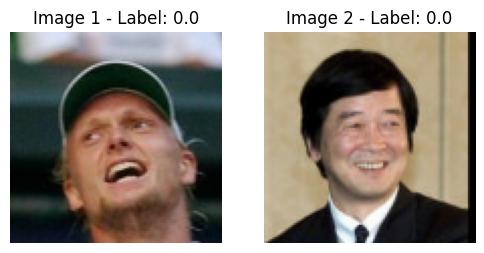

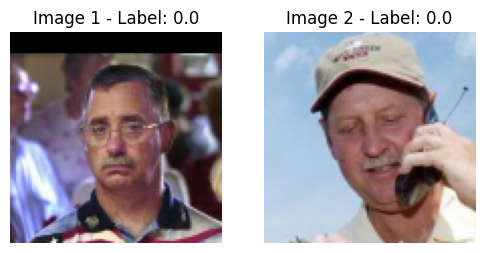

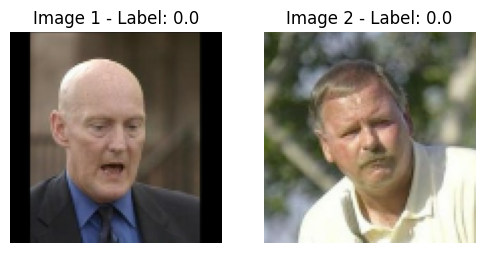

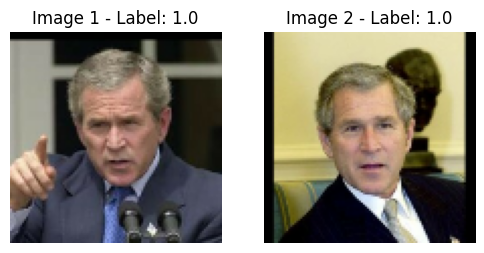

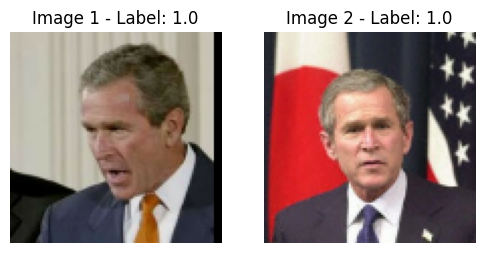

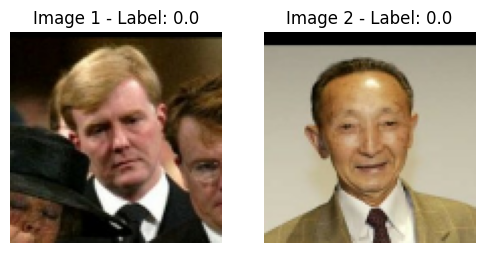

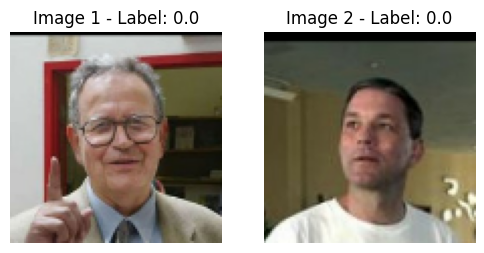

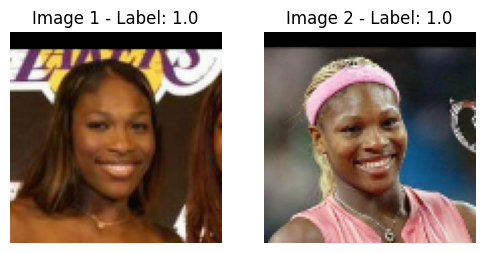

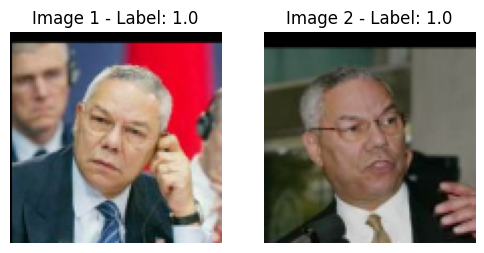

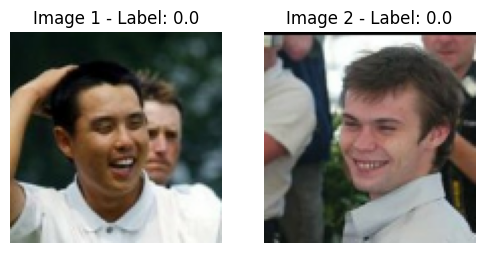

In [ ]:
import matplotlib.pyplot as plt

# Define the number of images to plot
n = 10
# Iterate through the dataset and plot n pairs of images
for i, (images, labels) in enumerate(dataset.take(n)):
    # Unpack the images and labels
    image1, image2 = images  # Assuming each element in the dataset is a tuple of two images and a label

    # Create a new figure for each pair of images
    plt.figure(figsize=(6, 3))

    # Plot the first image
    plt.subplot(1, 2, 1)
    plt.title(f"Image 1 - Label: {labels.numpy()}")
    plt.imshow(image1.numpy().astype("uint8"))
    plt.axis("off")

    # Plot the second image
    plt.subplot(1, 2, 2)
    plt.title(f"Image 2 - Label: {labels.numpy()}")
    plt.imshow(image2.numpy().astype("uint8"))
    plt.axis("off")

    # Show the figure
    plt.show()


In [ ]:
dataset = dataset.map(preprocess_image_pairs)

error: in user code:

    File "<ipython-input-66-cd0b6e5169ad>", line 59, in preprocess_image_pairs  *
        img_1 = read_image(image_1)
    File "<ipython-input-66-cd0b6e5169ad>", line 21, in read_image  *
        faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)

    error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'detectMultiScale'
    > Overload resolution failed:
    >  - image is not a numpy array, neither a scalar
    >  - Expected Ptr<cv::UMat> for argument 'image'
    


AttributeError: 'SymbolicTensor' object has no attribute 'tensor_shape'